# GEC Data Science Program
## Level 1, Lab 2

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

### Data load

We use Titanic data for this lab again.

In [3]:
d = pd.read_csv("train.csv", index_col=0)

In [4]:
d.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### More on Visualization

#### A nice visualization library: Seaborn
https://seaborn.pydata.org/

In [5]:
# install seaborn if needed
!pip install seaborn

You are using pip version 9.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import seaborn as sns

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
d1=d[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].fillna(0)

In [10]:
d1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


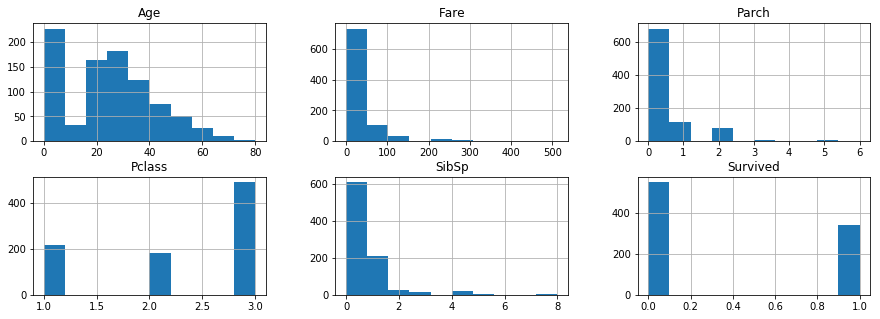

In [9]:
d1.hist(layout=(2,3), figsize=(15,5));

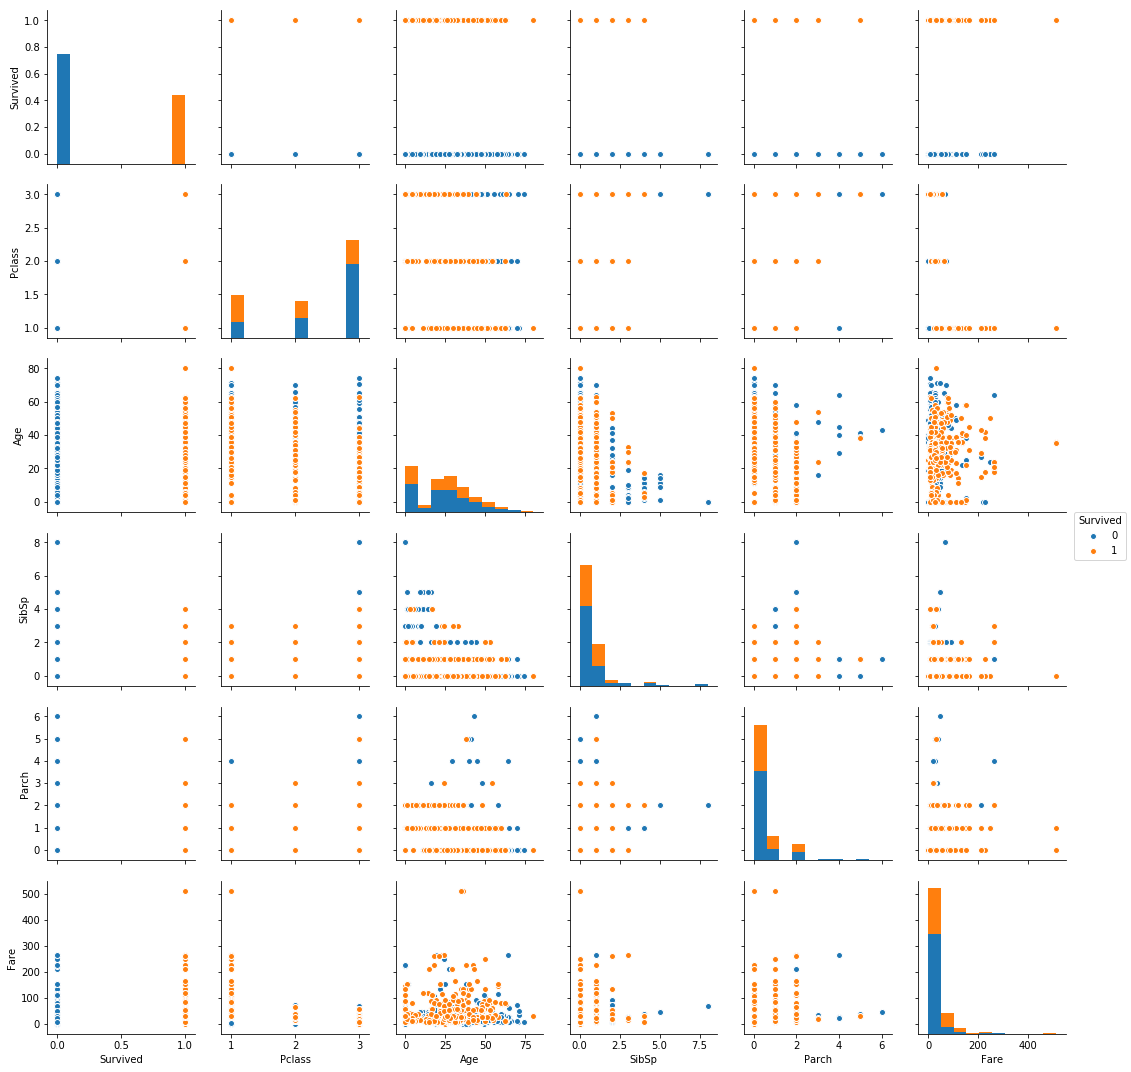

In [11]:
sns.pairplot(d1, hue="Survived");

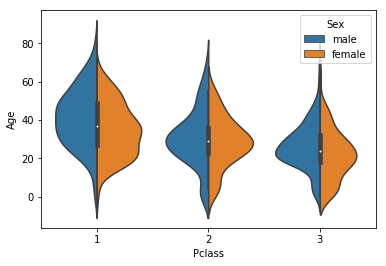

In [12]:
sns.violinplot(x="Pclass", y="Age", hue="Sex", data=d, split=True);

C:\Users\Shahab\Anaconda3\lib\site-packages\seaborn\categorical.py:2764: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


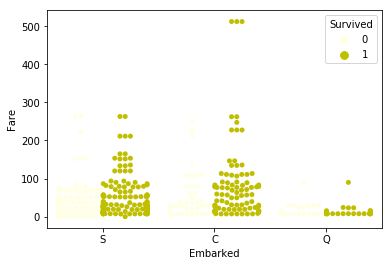

In [13]:
sns.swarmplot(x="Embarked", y="Fare", hue="Survived", data=d, split=True, color='y');

In [15]:
d1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


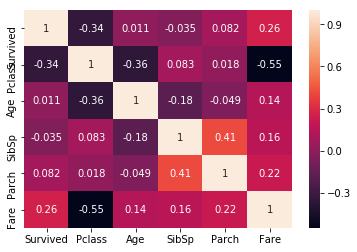

In [14]:
sns.heatmap(d1.corr(), annot=True)

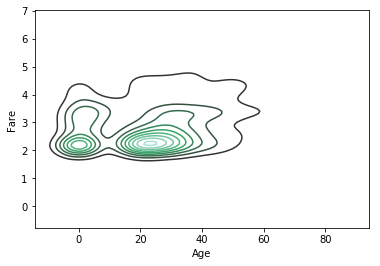

In [16]:
sns.kdeplot(d1.Age, np.log(d1.Fare+1));

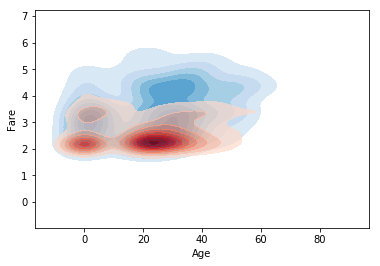

In [17]:
sns.kdeplot(d1.Age[d1.Survived==1], np.log(d1.Fare[d1.Survived==1]+1), shade=True, shade_lowest=False, cmap=plt.cm.Blues);
sns.kdeplot(d1.Age[d1.Survived==0], np.log(d1.Fare[d1.Survived==0]+1), shade=True, shade_lowest=False, cmap=plt.cm.Reds, alpha = 0.7);

## Pre-processing

### Q: What data types do we have in this dataset?

In [18]:
d.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
d.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 'Survived' : binary
# 'Pclass'   : categorical
# 'Name'     : string
# 'Sex'      : categorical
# 'Age'      : numerical
# 'SibSp'    : numercial
# 'Parch'    : numerical
# 'Ticket'   : string
# 'Fare'     : numerical
# 'Cabin'    : string
# 'Embarked' : categorical

### Q: How many unique values are there in each column?

In [21]:
for c in d.columns:
    print(c,len(d[c].unique()))

Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


### Q: Based on above values, which columns can be used as features?

In [22]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [23]:
target = "Survived"

In [24]:
df = d[features]

In [25]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


## Encoding

### Q: How do we deal with Categorical features?

In [26]:
#onehot encoding
pd.get_dummies(df, columns=["Sex"]).head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,S,0,1
2,1,38.0,1,0,71.2833,C,1,0
3,3,26.0,0,0,7.9250,S,1,0
4,1,35.0,1,0,53.1000,S,1,0
5,3,35.0,0,0,8.0500,S,0,1


In [66]:
#onehot encoding
pd.get_dummies(df, columns=["Embarked"]).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,0,0,1
2,1,female,38.0,1,0,71.2833,1,0,0
3,3,female,26.0,0,0,7.9250,0,0,1
4,1,female,35.0,1,0,53.1000,0,0,1
5,3,male,35.0,0,0,8.0500,0,0,1


In [27]:
df_encoded = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"], drop_first=True)

In [28]:
df_encoded.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,1,0,1,0,1
2,38.0,1,0,71.2833,0,0,0,0,0
3,26.0,0,0,7.9250,0,0,1,0,1
4,35.0,1,0,53.1000,0,0,0,0,1
5,35.0,0,0,8.0500,1,0,1,0,1


## Missing value imputation

### Q: How many missing values are there? And how do we deal with them?

In [30]:
df_encoded.isnull().sum()

Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Pclass_2        0
Pclass_3        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [31]:
df_encoded.Age.mean()

29.69911764705882

In [32]:
df_encoded.Age.fillna(df_encoded.Age.mean(), inplace=True)

In [33]:
df_encoded.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Other ways to deal with missing values:
- prediction (e.g. linear regression)
- LVCF (last value carry forward): for time series

## Transformation

### Distribution Normalizing and Scaling

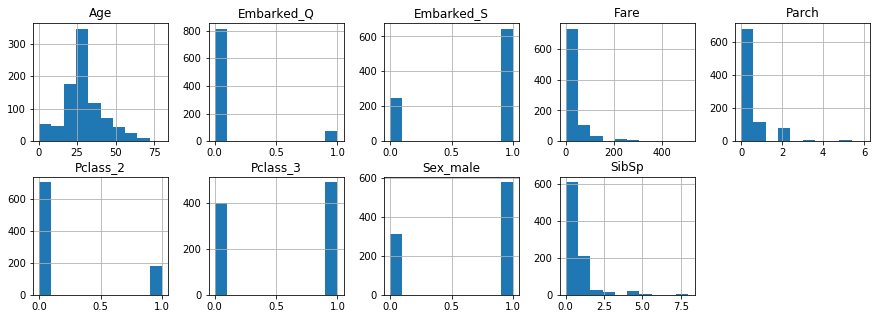

In [34]:
df_encoded.hist(layout=(2,5), figsize=(15,5));

### Q: Which continous variables are not Normal (Gaussian) distribution. How do we make them more Normal?

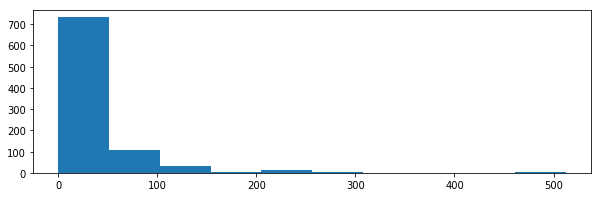

In [35]:
plt.figure(figsize=(10,3))
plt.hist(df_encoded.Fare);

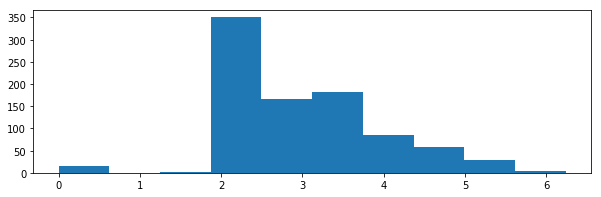

In [36]:
plt.figure(figsize=(10,3))
plt.hist(np.log(df_encoded.Fare+1));

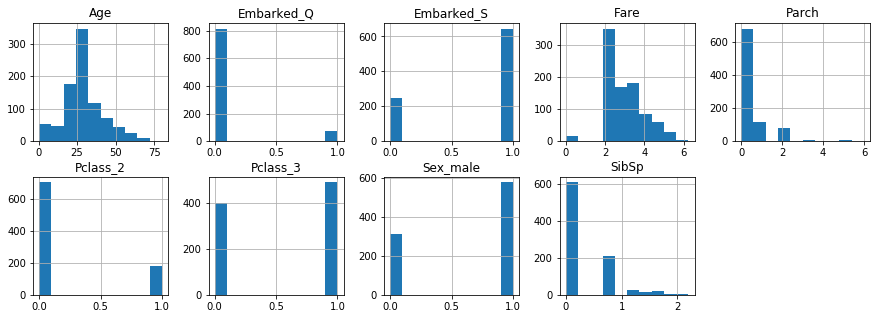

In [37]:
dfn = df_encoded.copy()

dfn.Fare = np.log(df_encoded.Fare+1)

dfn.SibSp = np.log(df_encoded.SibSp+1)

dfn.hist(layout=(2,5), figsize=(15,5));

### Q: How do we make all features the same scale (zero mean and one std)?

In [38]:
dfn.mean()

Age           29.699118
SibSp          0.281839
Parch          0.381594
Fare           2.962246
Sex_male       0.647587
Pclass_2       0.206510
Pclass_3       0.551066
Embarked_Q     0.086420
Embarked_S     0.722783
dtype: float64

In [39]:
dfn.std()

Age           13.002015
SibSp          0.462838
Parch          0.806057
Fare           0.969048
Sex_male       0.477990
Pclass_2       0.405028
Pclass_3       0.497665
Embarked_Q     0.281141
Embarked_S     0.447876
dtype: float64

In [40]:
#Chan Yu:
dfn1 = (dfn-dfn.mean())/dfn.std()

In [41]:
dfn1.mean()

Age           4.490952e-15
SibSp        -3.982349e-16
Parch        -3.638441e-17
Fare          3.930264e-15
Sex_male     -1.687140e-16
Pclass_2      5.507504e-17
Pclass_3     -1.841649e-16
Embarked_Q    2.242875e-16
Embarked_S   -1.624838e-16
dtype: float64

In [42]:
dfn1.std()

Age           1.0
SibSp         1.0
Parch         1.0
Fare          1.0
Sex_male      1.0
Pclass_2      1.0
Pclass_3      1.0
Embarked_Q    1.0
Embarked_S    1.0
dtype: float64

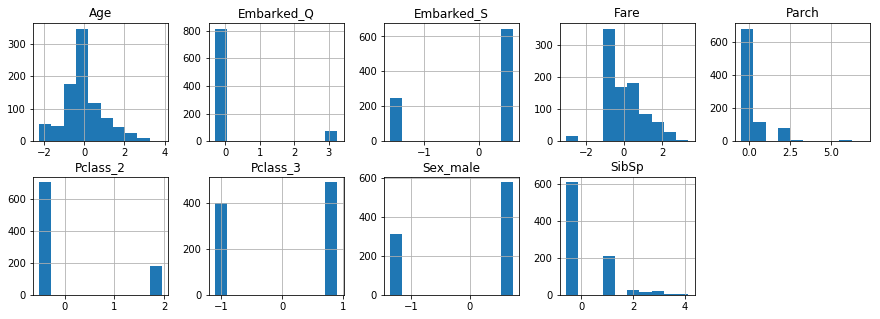

In [43]:
dfn1.hist(layout=(2,5), figsize=(15,5));

In [44]:
dfn1.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,-0.592148,0.888665,-0.473408,-0.879247,0.737281,-0.509865,0.902081,-0.30739,0.618959
2,0.638430,0.888665,-0.473408,1.360456,-1.354813,-0.509865,-1.107304,-0.30739,-1.613803
3,-0.284503,-0.608937,-0.473408,-0.798092,-1.354813,-0.509865,0.902081,-0.30739,0.618959
4,0.407697,0.888665,-0.473408,1.061442,-1.354813,-0.509865,-1.107304,-0.30739,0.618959
5,0.407697,-0.608937,-0.473408,-0.783739,0.737281,-0.509865,0.902081,-0.30739,0.618959


### Q: How do we scale train and test data?
    a. Scale each dataset independent of the other
    b. First scale all data then split to train and test
    c. Scale training data first, then scale test data the same way (using mean and std of training data)

b and c. Usually c.

### Q: How do we deal with outliers?

### A better way to Standardize the data (using scikit learn)

#### Scikit Learn is a very good MAchine Learning library
http://scikit-learn.org/

In [45]:
from sklearn import preprocessing

In [46]:
sc = preprocessing.StandardScaler()

In [47]:
dfn = sc.fit_transform(dfn)

Now we can scale the test data the same way. For example:

df_test = sc.transform(df_test)

In [50]:
dfn

array([[-0.5924806 ,  0.889164  , -0.47367361, ...,  0.90258736,
        -0.30756234,  0.61930636],
       [ 0.63878901,  0.889164  , -0.47367361, ..., -1.10792599,
        -0.30756234, -1.61470971],
       [-0.2846632 , -0.60927946, -0.47367361, ...,  0.90258736,
        -0.30756234,  0.61930636],
       ..., 
       [ 0.        ,  0.889164  ,  2.00893337, ...,  0.90258736,
        -0.30756234,  0.61930636],
       [-0.2846632 , -0.60927946, -0.47367361, ..., -1.10792599,
        -0.30756234, -1.61470971],
       [ 0.17706291, -0.60927946, -0.47367361, ...,  0.90258736,
         3.25137334, -1.61470971]])

### Principal Component Analysis (PCA)

In [51]:
from sklearn import decomposition

In [52]:
pca = decomposition.PCA()

In [53]:
df_pca = pca.fit_transform(dfn)

In [54]:
df_pca

array([[-0.97372685,  0.38227226, -1.45410221, ..., -0.78012778,
         0.23931583,  0.21597583],
       [ 1.55881189,  0.60137778,  1.94222405, ..., -0.76389432,
         0.81457666,  0.26365363],
       [-0.82953559,  0.20496609, -0.59787846, ..., -0.41087117,
        -0.003128  , -0.05608142],
       ..., 
       [ 1.14542888,  1.77436073, -1.04578548, ...,  0.25825668,
         0.1510594 , -0.09815258],
       [-0.05308606, -0.31501896,  1.27355563, ...,  0.82852086,
         0.39411206,  0.53269933],
       [-2.643618  ,  1.25202108,  2.17443396, ...,  0.11113207,
        -0.74468991, -0.00416414]])

### Q: Plot the first two principal components. Color 'sirvived' and 'died' differently.

In [55]:
len(dfn1.columns)

9

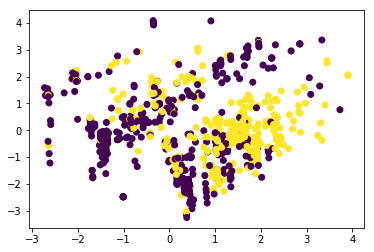

In [56]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=d.Survived)

### Q: How much variation is explained by each Principal Component?

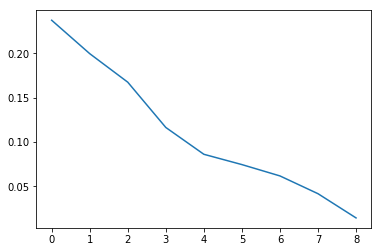

In [57]:
plt.plot(pca.explained_variance_ratio_)

## Linear Discriminant Analysis (LDA)

In [58]:
from sklearn import discriminant_analysis

In [59]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()

In [60]:
df_lda = lda.fit_transform(dfn, d.Survived)

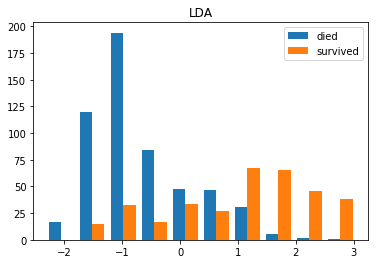

In [61]:
plt.hist([df_lda[d.Survived==0],df_lda[d.Survived==1]]);
plt.legend(['died','survived']);
plt.title("LDA");

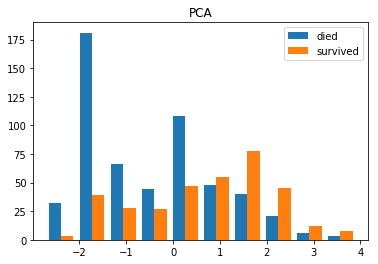

In [62]:
plt.hist([df_pca[:,0][d.Survived==0],df_pca[:,0][d.Survived==1]]);
plt.legend(['died','survived']);
plt.title("PCA")

### Q: Which transformation better separates the classes?

LDA

### Q: Include 'title' from HW1 and create some visualizations.

### Q: Is there any way we can extract variables from 'Cabin' and 'Ticket' columns?

In [64]:
d.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
D              3
C22 C26        3
E101           3
F2             3
C78            2
C83            2
D35            2
D17            2
C68            2
D33            2
C52            2
B35            2
B22            2
B5             2
C123           2
B49            2
C2             2
B51 B53 B55    2
C92            2
F4             2
C124           2
C65            2
E8             2
D36            2
B18            2
B58 B60        2
              ..
C101           1
D11            1
B101           1
D47            1
C49            1
C103           1
D30            1
C32            1
B4             1
B3             1
B80            1
C70            1
D56            1
A7             1
A6             1
B82 B84        1
D28            1
E31            1
E34            1
C95            1
B50            1
C106           1
E36            1
E68            1
E49            1
C62 C64        1
B73            1
E63           

In [65]:
d.Ticket

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
6                330877
7                 17463
8                349909
9                347742
10               237736
11              PP 9549
12               113783
13            A/5. 2151
14               347082
15               350406
16               248706
17               382652
18               244373
19               345763
20                 2649
21               239865
22               248698
23               330923
24               113788
25               349909
26               347077
27                 2631
28                19950
29               330959
30               349216
             ...       
862               28134
863               17466
864            CA. 2343
865              233866
866              236852
867       SC/PARIS 2149
868            PC 17590
869              345777
870              347742
871              349248
872 